Importing data using Beautiful Soup

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [26]:
url = "https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state"
response = requests.get(url)

In [27]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")
# soup.head()

Parsing Starbucks data


In [300]:
# len(soup.find_all("table"))

In [301]:
# table = soup.find_all("table")[0]

In [302]:
# table.find_all("tr")[2]

In [31]:
cells = table.find_all("tr")[1].find_all("th")
cells
state_tag = cells[0].find("a") or cells[0]
state = state_tag.text
print(state)

California
California


In [32]:
cells = table.find_all("tr")[1].find_all("td")
cells
stores23_tag = cells[0]
stores23 = stores23_tag.text
print(stores23)

3,080
3,080


In [33]:
# initialize an empty list
rows = []

# iterate over all rows in the faculty table
for state in table.find_all("tr")[1:]:

    # Get all the cells (<td>) in the row.
    cells = state.find_all("th")
    cells2 = state.find_all("td")
    # The information we need is the text between tags.

    # Find the the name of the faculty in cell[0]
    # which for most faculty is contained in the <strong> tag
    state_tag = cells[0].find("a")
    state = state_tag.text

    # Find the office of the faculty in cell[1]
    # which for most faculty is contained in the <a> tag
    stores23_tag = cells2[0]
    stores23 = stores23_tag.text

    # Find the email of the faculty in cell[3]
    # which for most faculty is contained in the <a> tag
    stores21_tag = cells2[1]
    stores21 = stores21_tag.text

    stores24_tag = cells2[2]
    stores24 = stores24_tag.text


    # Append this data.
    rows.append({
        "state": state,
        "Stores 2023": stores23,
        "Stores 2021": stores21,
        "Stores 2024": stores24
    })

In [299]:
Starbucks_count = pd.DataFrame(rows)
# Starbucks_count

In [36]:
urldunkin = "https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state"
response2 = requests.get(urldunkin)

In [37]:
soup2 = BeautifulSoup(response2.content, "html.parser")

In [38]:
len(soup2.find_all("table"))
tabledunkin = soup2.find_all("table")[0]

In [39]:
cells = tabledunkin.find_all("tr")[1].find_all("th")
cells
state_tag = cells[0].find("a") or cells[0]
state = state_tag.text
print(state)

New York
New York


In [40]:
# initialize an empty list
rows2 = []

# iterate over all rows in the faculty table
for state in tabledunkin.find_all("tr")[1:]:

    # Get all the cells (<td>) in the row.
    cells = state.find_all("th")
    cells2 = state.find_all("td")
    # The information we need is the text between tags.

    # Find the the name of the faculty in cell[0]
    # which for most faculty is contained in the <strong> tag
    state_tag = cells[0].find("a")
    state = state_tag.text

    # Find the office of the faculty in cell[1]
    # which for most faculty is contained in the <a> tag
    stores24_tag = cells2[0]
    stores24 = stores24_tag.text

    # Find the email of the faculty in cell[3]
    # which for most faculty is contained in the <a> tag
    stores23_tag = cells2[1]
    stores23 = stores23_tag.text

    # Append this data.
    rows2.append({
        "state": state,
        "Stores 2024": stores24,
        "Stores 2023": stores23
    })

In [298]:
dunkin = pd.DataFrame(rows2)
# dunkin

Merging and tidying dataframe

In [297]:
# Starbucks_count

In [64]:
big_table = Starbucks_count.merge(dunkin, on= ["state"], suffixes= ("starbucks", "dunkin"))

In [296]:
# big_table

In [69]:
population = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")[0]

In [95]:
population = population[["State", "Census population, April 1, 2020 [1][2]"]]
population = population.rename(columns= {"State" : "state", "Census population, April 1, 2020 [1][2]" : "Population"})

In [82]:
Starbucks_count["Location"] = "Starbucks"
dunkin["Location"] = "Dunkin"

In [294]:
long_table = pd.concat([Starbucks_count, dunkin])
bigger_table = long_table.merge(population, on = ["state"])
bigger_table = bigger_table.sort_values(["state", "Location"], ascending= True)
bigger_table = bigger_table[["state", "Location", "Stores 2021", "Stores 2023", "Stores 2024", "Population"]]
# bigger_table

Revenues 
starbucks source: https://investor.starbucks.com/news/financial-releases/news-details/2024/Starbucks-Reports-Preliminary-Q4-and-Full-Fiscal-Year-2024-Results/default.aspx#:~:text=For%20the%20full%20fiscal%20year,down%208%25%20over%20prior%20year.

dunkin source: https://companiesmarketcap.com/dunkin-brands/revenue/ 


In [295]:
revenues = pd.DataFrame({"Location": ["Starbucks", "Dunkin"], "Revenue" : [36200000000, 1250000000]})
bigger_table = bigger_table.merge(revenues, on = "Location")


Regions variable


In [239]:
state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast',

    # Midwest
    'Ohio': 'Midwest', 'Indiana': 'Midwest', 'Illinois': 'Midwest', 'Michigan': 'Midwest',
    'Wisconsin': 'Midwest', 'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',

    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South',
    'Tennessee': 'South', 'Mississippi': 'South', 'Alabama': 'South', 'Oklahoma': 'South',
    'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',

    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West',
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}
#Dictionary coded by chat GPT because I did not want to type that much and worried about making a mistake as well

In [240]:
bigger_table['Region'] = bigger_table['state'].map(state_to_region)
bigger_table = bigger_table


**Analyze the Data**

First I want to look at the popularity of both chains in each state

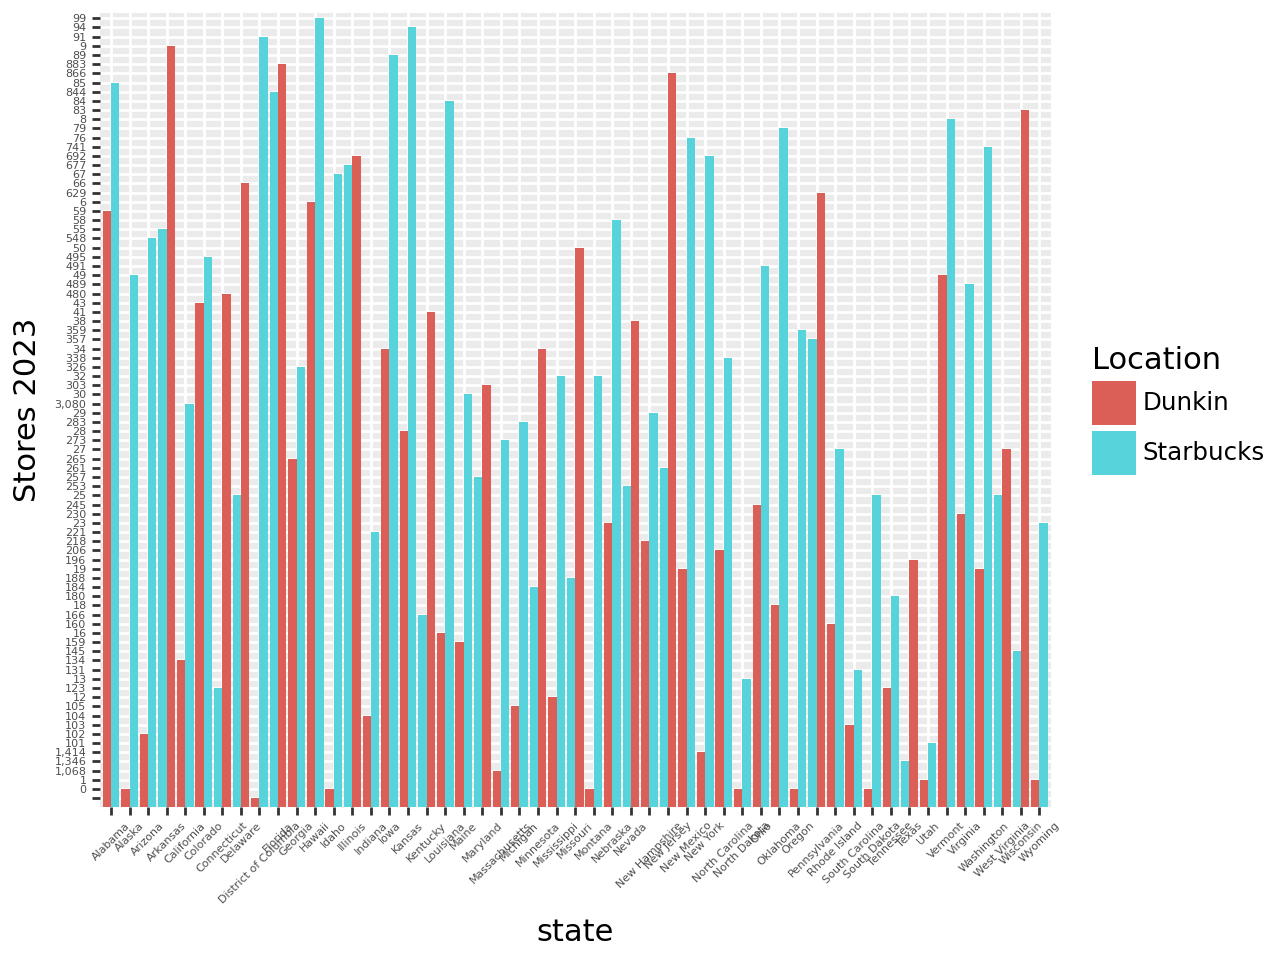

In [142]:
from plotnine import ggplot, aes, geom_bar, geom_point, labs, theme, element_text
(ggplot(bigger_table, aes(x = "state", y = "Stores 2023", fill = "Location")) + geom_bar(stat = "identity", position = "dodge")+ theme(axis_text_x=element_text(rotation=45, size = 4), axis_text_y= element_text(size = 4))
)

In my opinion there is way too much data to get any meaninngful information from this, so I am going to do by region

In [293]:
# bigger_table.head()

In [244]:
region_table = bigger_table.groupby(["Region", "Location"])["Stores 2023"].sum()

In [245]:
region_table = pd.DataFrame(region_table)
region_table = region_table.reset_index()

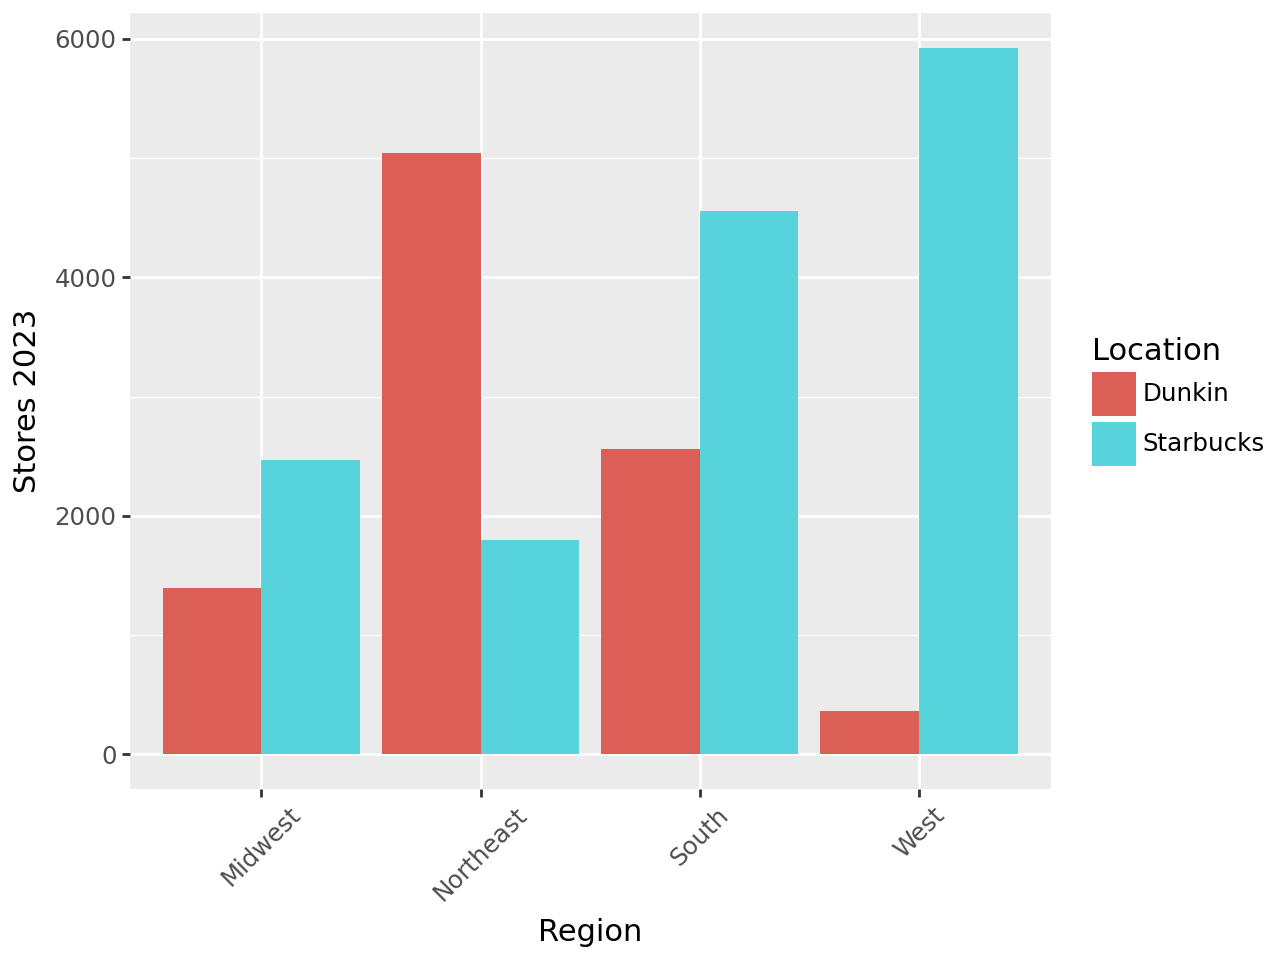

In [292]:
(ggplot(region_table, aes(x = "Region", y = "Stores 2023", fill = "Location")) + geom_bar(stat = "identity", position = "dodge")+ theme(axis_text_x=element_text(rotation=45)))


Starbucks seems to dominate Dunkin in terms of location counts, especially in the West. Dunkin only has more in the northeast.

In [ ]:
Next I want to evaluate the revenue per location 

In [290]:
# dunkin.head()

In [216]:
#The math was not working because of commas imported in the numbers that were in the thousands from webscraping, so I cleaned and converted to int

Starbucks_count.iloc[0,1] = 3080
Starbucks_count.iloc[1,1] = 1346
dunkin.iloc[0,2]  = 1414
dunkin.iloc[1,2]  = 1068
Starbucks_count["Stores 2023"]=Starbucks_count["Stores 2023"].astype(int)
# if dunkin["Stores 2023"] == "":
#     dunkin["Stores 2023"] = 0
dunkin['Stores 2023'] = pd.to_numeric(dunkin['Stores 2023'], errors='coerce').fillna(0).astype(int)





In [217]:
TotalStarbucks = Starbucks_count["Stores 2023"].sum()
TotalDunkin = dunkin["Stores 2023"].sum()

totals = pd.DataFrame({"Location" : ["Starbucks", "Dunkin"], "Total" : [TotalStarbucks, TotalDunkin]})



In [233]:
totals["Revenue"] = [36200000000, 1250000000]
totals["Revenue per store"] = (totals["Revenue"])/(totals["Total"])
totals


,Location,Total,Revenue,Revenue per store
0,Starbucks,14744,36200000000,2.455236e+06
1,Dunkin,9361,1250000000,1.335327e+05


In [236]:
(totals["Revenue per store"].iloc[0])/(totals["Revenue per store"].iloc[1])

18.386771568095497

Starbucks seems to make over 18 times as much as dunkin per store!

The last thing I want to look at is if the number of locations follows the population

In [253]:
#First make a standardized variable for stores and population, I will use min-max scaling
#need to rerun the code to create the merged table since the store 2023 variable was not originally numeric



In [279]:
# region_table = bigger_table.groupby(["Region", "Location"]).agg({"Stores 2023" : "sum", "Population" : "sum"})
# region_table = region_table.reset_index()
region_table["Stores 2023 std"] = (region_table["Stores 2023"] - region_table["Stores 2023"].min()) / (region_table["Stores 2023"].max() - region_table["Stores 2023"].min())
region_table["population std"] = (region_table["Population"] - region_table["Population"].min()) / (region_table["Population"].max() - region_table["Population"].min())
#having values of 0 for min does not really make sense for this plot, so I am just going to add .1 to each value
region_table["Stores 2023 std"] = region_table["Stores 2023 std"] + .1
region_table["population std"] = region_table["population std"] + .1

region_table_long = region_table.melt(id_vars= ["Region", "Location"], var_name= "measure", value_vars= ["Stores 2023 std", "population std"], value_name= "score")



In [289]:
region_table_long = region_table.melt(id_vars= ["Region", "Location"], var_name= "measure", value_vars= ["Stores 2023 std", "population std"], value_name= "score")
region_table_long.head()

,Region,Location,measure,score
0,Midwest,Dunkin,Stores 2023 std,0.286151
1,Midwest,Starbucks,Stores 2023 std,0.478597
2,Northeast,Dunkin,Stores 2023 std,0.941727
3,Northeast,Starbucks,Stores 2023 std,0.358453
4,South,Dunkin,Stores 2023 std,0.494604


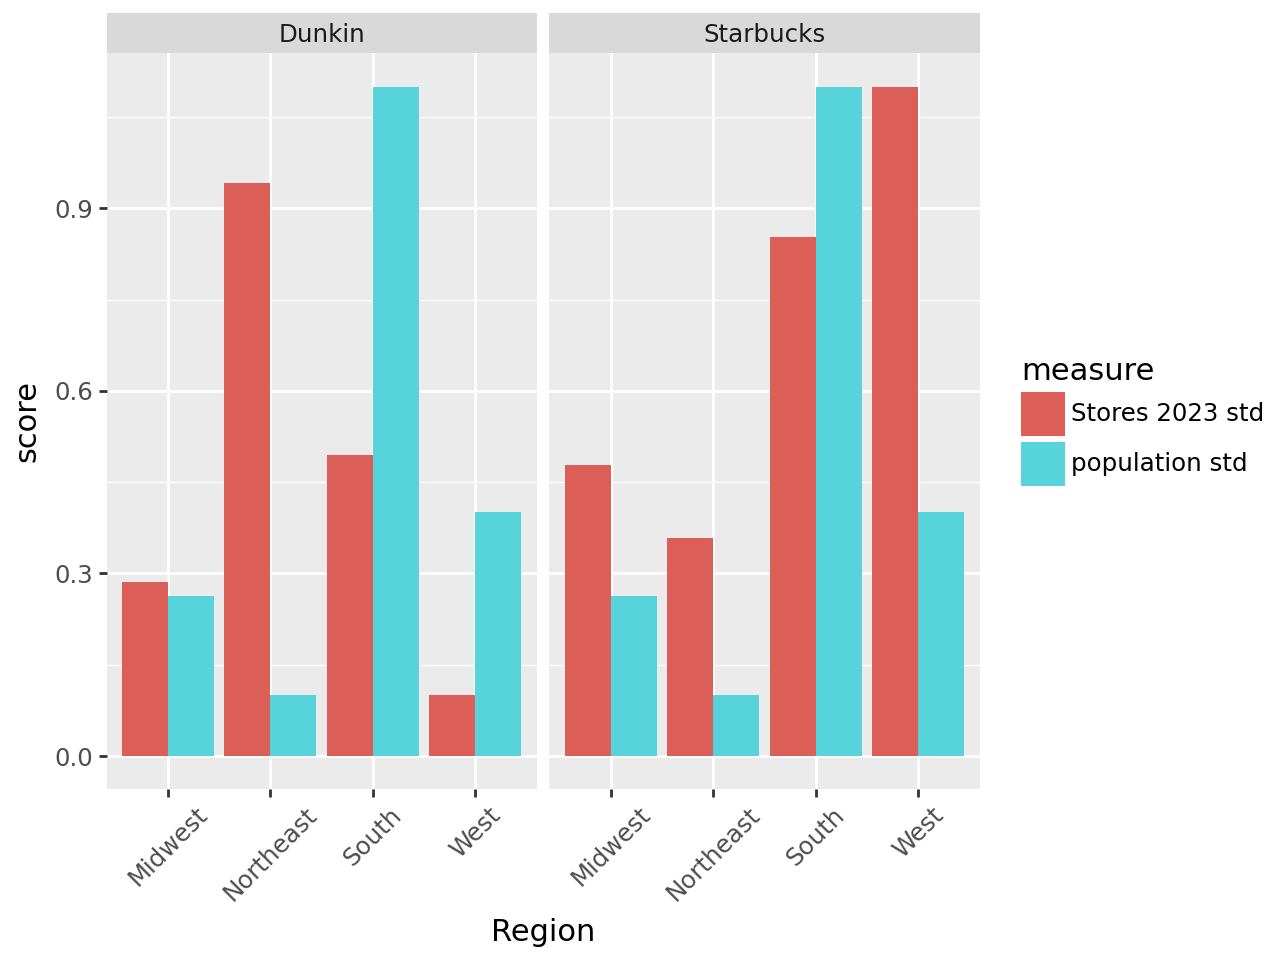

In [281]:
from plotnine import facet_wrap, theme_classic
(ggplot(region_table_long, aes(x = "Region", y = "score", fill = "measure")) + geom_bar(stat = "identity", position = "dodge") + facet_wrap("Location") + theme(axis_text_x=element_text( rotation =45)))


In [287]:
def webscraper(url):
  import pandas as pd
  import requests
  from bs4 import BeautifulSoup 
  response = requests.get(url)
  from bs4 import BeautifulSoup
  soup = BeautifulSoup(response.content, "html.parser")
  table = soup.find_all("table")[0]
  import re
  store = re.findall(r"(?<=rankings/)\w+", url)
  rows = []

  for state in table.find_all("tr")[1:]:

    # Get all the cells
    cells = state.find_all("th")
    cells2 = state.find_all("td")
    # The information we need is the text between tags.

    # Find the the name of the state in cell[0]
  
    state_tag = cells[0].find("a")
    state = state_tag.text

    # Find the count of stores
    storecount_tag = cells2[0]
    storescount = storecount_tag.text



    # Append this data.
    rows.append({
        "state": state,
        "Stores Count": storescount,
    })
  store_df = pd.DataFrame(rows)
  return store, store_df



In [288]:
webscraper("https://worldpopulationreview.com/state-rankings/chick-fil-a-by-state")

(['chick'],
                    state Stores Count
 0                  Texas          489
 1                Florida          334
 2                Georgia          327
 3             California          243
 4         North Carolina          174
 5               Virginia          151
 6           Pennsylvania          113
 7                   Ohio          109
 8         South Carolina          108
 9              Tennessee          104
 10              Maryland           98
 11               Alabama           95
 12              Illinois           74
 13            New Jersey           66
 14               Indiana           64
 15             Louisiana           63
 16              Colorado           61
 17              Oklahoma           61
 18               Arizona           56
 19              New York           55
 20              Kentucky           54
 21              Missouri           53
 22           Mississippi           47
 23              Arkansas           36
 24          